In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Heart Disease.csv')

In [3]:
df.shape

(319795, 18)

# Removing Duplicate

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(301717, 18)

In [5]:
df.HeartDisease.value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

# Encoding The DataSet with labelEncoder


In [6]:
 from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [7]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

# Separating x and y


In [8]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [9]:
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7,0,1,1,8,3,2,0,1,6,1,0,0
319791,29.84,1,0,0,0,0,0,1,3,3,0,1,4,5,1,0,0
319792,24.24,0,0,0,0,0,0,0,5,3,0,1,2,6,0,0,0
319793,32.81,0,0,0,0,0,0,0,1,3,0,0,2,12,0,0,0


In [10]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int32

# Imbalance Data handling


In [11]:
df.HeartDisease.value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

In [12]:
not_HeartDisease=(274456/(274456+27261))*100
HeartDisease=(27261/(274456+27261))*100

In [13]:
print('No HeartDisease {} percent of the total people'.format(not_HeartDisease))

No HeartDisease 90.96471196518591 percent of the total people


In [14]:
print('HeartDisease {} percent of the total people'.format(HeartDisease))

HeartDisease 9.03528803481408 percent of the total people


In [15]:
HeartDisease_no=df[df['HeartDisease']==0]
HeartDisease_yes=df[df['HeartDisease']==1]

In [16]:
HeartDisease_no.shape

(274456, 18)

In [17]:
HeartDisease_yes.shape

(27261, 18)

# So we have to balance our dataset . Now applying Random over sampling techniques


In [18]:
from imblearn.over_sampling import RandomOverSampler
random_over_sampler = RandomOverSampler(random_state =100)

In [19]:
x_new,y_new=random_over_sampler.fit_resample(x,y)
#x1_new=x2_new=x3_new=x4_new=x5_new=x6_new=x7_new=x8_new=x9_new=x_new
x_new

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,35.43,0,0,0,0,0,0,0,12,5,0,1,4,5,0,0,1
548908,23.01,1,0,0,0,20,0,1,8,5,0,1,4,6,0,0,0
548909,30.80,0,0,0,0,0,0,0,10,4,2,0,2,5,0,0,0
548910,44.63,0,0,0,0,7,1,0,9,2,2,0,2,8,0,0,0


In [20]:
#y1_new=y2_new=y3_new=y4_new=y5_new=y6_new=y7_new=y8_new=y9_new=y_new
y_new

0         0
1         0
2         0
3         0
4         0
         ..
548907    1
548908    1
548909    1
548910    1
548911    1
Name: HeartDisease, Length: 548912, dtype: int32

In [21]:
x_new.shape

(548912, 17)

In [22]:
y_new.shape

(548912,)

In [23]:
y_new.value_counts()

0    274456
1    274456
Name: HeartDisease, dtype: int64

# 4-> Logistic Regression Algorithm implementation


# LR for holdout cross validation with Randon Over Sampling


In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [25]:
over_xtrain,over_xtest,over_ytrain,over_ytest = train_test_split(x_new,y_new,test_size = 0.30 ,random_state =42)
lr.fit(over_xtrain,over_ytrain)

LogisticRegression()

In [26]:
OverSampleing_dataset_accuracy3 = lr.score(over_xtest,over_ytest)
OverSampleing_dataset_accuracy3

0.7446348543182287

# Logistic Regression for KFold cross validation for Random Over sampling


In [27]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 10)

In [28]:
OverSampleingDataset_kfold_result3 = cross_val_score(lr,x_new,y_new,cv = kfold)
OverSampleingDataset_kfold_result3


array([0.68478102, 0.68949938, 0.68951194, 0.69869377, 0.70665501,
       0.73935618, 0.6959793 , 0.69262721, 0.69727278, 0.68127744])

In [29]:
OverSampleingDataset_kfold_result3.mean()

0.6975654036537773

# Logistic Regression for StratiFied KFold cross validation for Over sampling


In [30]:
from sklearn.model_selection import StratifiedKFold
Stf_Kfold = StratifiedKFold(n_splits = 10)

In [31]:
OverSampleingDataset_Sf_kfold_result3 = cross_val_score(lr,x_new,y_new,cv = Stf_Kfold)
OverSampleingDataset_Sf_kfold_result3

array([0.74601035, 0.73870509, 0.74329125, 0.74245323, 0.74607859,
       0.73993915, 0.74633364, 0.73768013, 0.75094278, 0.74369204])

In [32]:
OverSampleingDataset_Sf_kfold_result3.mean()

0.7435126255389021

# Now from over sampling ,we calculate all confusion matrix performance


In [33]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve
lr.fit(over_xtrain,over_ytrain)

LogisticRegression()

In [34]:
pred_y3=lr.predict(over_xtest)#Predicted Class 
pred_y3

array([0, 1, 0, ..., 1, 1, 0])

In [35]:
over_ytest

374936    1
319916    1
56188     0
444156    1
170814    0
         ..
285161    0
217312    1
353792    1
318432    1
216193    0
Name: HeartDisease, Length: 164674, dtype: int32

In [36]:
np.array(over_ytest) #actual class/y

array([1, 1, 0, ..., 1, 1, 0])

In [37]:
print(classification_report(over_ytest,pred_y3))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74     82143
           1       0.74      0.76      0.75     82531

    accuracy                           0.74    164674
   macro avg       0.74      0.74      0.74    164674
weighted avg       0.74      0.74      0.74    164674



In [38]:
cm3=confusion_matrix(over_ytest,pred_y3)
cm3

array([[59936, 22207],
       [19845, 62686]], dtype=int64)

# Visualization with heatmap performance of confussion matrix for Logistic regresssion


Text(33.0, 0.5, 'Actual Values')

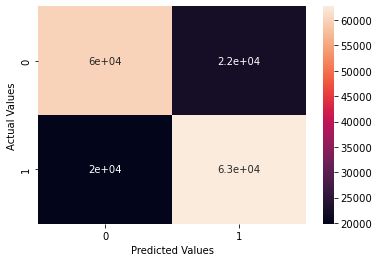

In [39]:
sns.heatmap(cm3,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [40]:
tp,fn,fp,tn=confusion_matrix(over_ytest,pred_y3).reshape(-1)

In [41]:
tp

59936

In [42]:
fn

22207

In [43]:
fp

19845

In [44]:
tn

62686

# Accuracy

In [45]:
(tp+tn)/(tp+fn+fp+tn)

0.7446348543182287

In [46]:
#precision
ppv = tp/(tp+fp)
print(ppv)

0.7512565648462667


In [47]:
#Recall
trp = tp/(tp+fn)
print(trp)

0.7296543832097683


In [48]:
#1-Specificity
fpr = fp/(fp+tn)
print(fpr)

0.24045510171935394


In [49]:
#F1-score
f1_score = (2*ppv*trp)/(ppv+trp)
print(f1_score)

0.7402979175415626


In [50]:
#Specificity
tnr = tn/(tn+fp)
print(tnr)

0.7595448982806461


In [51]:
#CSI
csi = tp/(tp+fn+fp)
print(csi)

0.587676981605679


In [52]:
#FDR
fdr = fp/(tp+fp)
print(fdr)

0.24874343515373334


# Roc and Auc curve for Logistic regression classifier

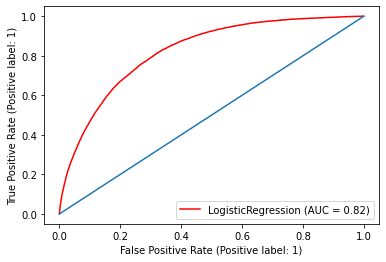

In [53]:
plot_roc_curve(lr,over_xtest,over_ytest,color='red')
plt.plot([0,1],[0,1])

# Tuning Logistic Regression Algorithm using Randomized Search CV


In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
penalty=['l1', 'l2', 'elasticnet', 'none'] 
class_weight=['dict','balanced']
solver=['newton-cg','lbfgs','liblinear','sag','saga']
max_iter=np.random.randint(1,200,20)
multi_class=['auto','ovr','multinomial']
parameters={
    'penalty':penalty,
'class_weight':class_weight,
    'solver':solver,
    'max_iter':max_iter,
    'multi_class':multi_class
}

In [56]:
print(parameters)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'class_weight': ['dict', 'balanced'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': array([  3, 118,  59,  62,  92,  75,  93,  82, 189,  82, 193,  12,  31,
       111,  74, 134,  95,   6,  62,  43]), 'multi_class': ['auto', 'ovr', 'multinomial']}


In [57]:
import warnings
warnings.filterwarnings('ignore')
r=RandomizedSearchCV(lr,parameters,n_iter=200,cv=3)
r.fit(over_xtrain,over_ytrain)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=200,
                   param_distributions={'class_weight': ['dict', 'balanced'],
                                        'max_iter': array([  3, 118,  59,  62,  92,  75,  93,  82, 189,  82, 193,  12,  31,
       111,  74, 134,  95,   6,  62,  43]),
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [58]:
result=pd.DataFrame(r.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_penalty,param_multi_class,param_max_iter,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.525184,0.099015,0.041668,0.007366,lbfgs,none,ovr,43,dict,"{'solver': 'lbfgs', 'penalty': 'none', 'multi_...",0.734455,0.734742,0.735179,0.734792,0.000298,69
1,14.038620,0.233581,0.035166,0.008431,saga,l2,ovr,93,dict,"{'solver': 'saga', 'penalty': 'l2', 'multi_cla...",0.746127,0.745274,0.747500,0.746300,0.000917,46
2,0.060758,0.002478,0.000000,0.000000,liblinear,none,auto,62,dict,"{'solver': 'liblinear', 'penalty': 'none', 'mu...",NaN,NaN,NaN,NaN,NaN,106
3,0.066667,0.005886,0.000000,0.000000,newton-cg,elasticnet,auto,93,balanced,"{'solver': 'newton-cg', 'penalty': 'elasticnet...",NaN,NaN,NaN,NaN,NaN,109
4,0.062509,0.000004,0.000000,0.000000,sag,l1,auto,111,dict,"{'solver': 'sag', 'penalty': 'l1', 'multi_clas...",NaN,NaN,NaN,NaN,NaN,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,11.902326,0.620203,0.036463,0.007365,saga,l2,ovr,189,dict,"{'solver': 'saga', 'penalty': 'l2', 'multi_cla...",0.746120,0.745274,0.747484,0.746293,0.000910,50
196,0.067714,0.007367,0.000000,0.000000,newton-cg,elasticnet,auto,111,dict,"{'solver': 'newton-cg', 'penalty': 'elasticnet...",NaN,NaN,NaN,NaN,NaN,105
197,0.067716,0.007369,0.000000,0.000000,liblinear,elasticnet,multinomial,82,balanced,"{'solver': 'liblinear', 'penalty': 'elasticnet...",NaN,NaN,NaN,NaN,NaN,104
198,0.062506,0.000003,0.000000,0.000000,newton-cg,l1,multinomial,6,balanced,"{'solver': 'newton-cg', 'penalty': 'l1', 'mult...",NaN,NaN,NaN,NaN,NaN,137


In [59]:
new_r=r.best_estimator_
new_r

LogisticRegression(class_weight='balanced', max_iter=193,
                   multi_class='multinomial')

In [60]:
new_r.score(over_xtrain,over_ytrain)

0.7467689296737959